In [1]:
!kaggle datasets download -d nirmalsankalana/crop-pest-and-disease-detection

Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/crop-pest-and-disease-detection
License(s): CC0-1.0
 99% 1.24G/1.25G [00:22<00:00, 82.8MB/s]
100% 1.25G/1.25G [00:22<00:00, 60.0MB/s]


In [2]:
%cd Dataset

/content/Dataset


In [3]:
!unzip /content/crop-pest-and-disease-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: Tomato leaf blight/leaf blight1302_.jpg  
  inflating: Tomato leaf blight/leaf blight1303_.jpg  
  inflating: Tomato leaf blight/leaf blight1304_.jpg  
  inflating: Tomato leaf blight/leaf blight1305_.jpg  
  inflating: Tomato leaf blight/leaf blight1306_.jpg  
  inflating: Tomato leaf blight/leaf blight1307_.jpg  
  inflating: Tomato leaf blight/leaf blight1308_.jpg  
  inflating: Tomato leaf blight/leaf blight1309_.jpg  
  inflating: Tomato leaf blight/leaf blight130_.jpg  
  inflating: Tomato leaf blight/leaf blight1310_.jpg  
  inflating: Tomato leaf blight/leaf blight1311_.jpg  
  inflating: Tomato leaf blight/leaf blight1312_.jpg  
  inflating: Tomato leaf blight/leaf blight1313_.jpg  
  inflating: Tomato leaf blight/leaf blight1314_.jpg  
  inflating: Tomato leaf blight/leaf blight1315_.jpg  
  inflating: Tomato leaf blight/leaf blight1316_.jpg  
  inflating: Tomato leaf blight/leaf blight131_.jpg  
  inflating: Tom

In [4]:
%cd ..

/content


In [5]:
import os
from PIL import Image
import numpy as np
import shutil

In [6]:
data_dir=r'/content/Dataset'
bad_img_list=[]
total=0
good=0
bad=0
classes=sorted(os.listdir(data_dir))
for klass in classes:
    good_class=0
    bad_class=0
    total_class=0
    msg=f'processing class {klass}'
    print(msg, '\r', end= '')
    classpath=os.path.join(data_dir, klass)
    flist=sorted(os.listdir(classpath))
    for f in flist:
        total +=1
        total_class +=1
        fpath=os.path.join(classpath,f)
        try:
            img= Image.open(fpath)
            array=np.asarray(img)
            good +=1
            good_class +=1
        except:
            bad_img_list.append(fpath)
            bad +=1
            bad_class +=1

    msg=f'class {klass} contains {total_class} files, {good_class} are valid image files and {bad_class} defective image files'
    print (msg)
msg=f'the dataset contains {total} image files, {good} are valid image files and {bad} are defective image files'
print (msg)
if bad>0:
    ans=input('to print a list of defective image files enter P, to not print press Enter')
    if ans == 'P' or ans == 'p':
        for f in bad_img_list:
            print (f)

class Cashew anthracnose contains 1729 files, 1729 are valid image files and 0 defective image files
class Cashew gumosis contains 392 files, 392 are valid image files and 0 defective image files
class Cashew healthy contains 1368 files, 1368 are valid image files and 0 defective image files
class Cashew leaf miner contains 1378 files, 1378 are valid image files and 0 defective image files
class Cashew red rust contains 1682 files, 1682 are valid image files and 0 defective image files
class Cassava bacterial blight contains 2614 files, 2614 are valid image files and 0 defective image files
class Cassava brown spot contains 1481 files, 1481 are valid image files and 0 defective image files
class Cassava green mite contains 1015 files, 1015 are valid image files and 0 defective image files
class Cassava healthy contains 1193 files, 1193 are valid image files and 0 defective image files
class Cassava mosaic contains 1205 files, 1205 are valid image files and 0 defective image files
class

In [7]:
# this code creates a corrected dataset with the defective image files removed
# you can use this dataset to create a model.
working_dir=r'/content'
corrected_dir=os.path.join(working_dir, 'corrected dataset') # where the corrected dataset will be stored
copied_count = 0
if os.path.isdir(corrected_dir):
    shutil.rmtree(corrected_dir) # make sure the corrected_dir is empty
os.mkdir(corrected_dir)
for klass in classes:
    classpath=os.path.join(data_dir, klass)
    dest_classpath=os.path.join(corrected_dir, klass)
    os.mkdir(dest_classpath)
    flist= os.listdir(classpath)
    for f in flist:
        fpath=os.path.join(classpath,f)
        dest_fpath=os.path.join(dest_classpath,f)
        if fpath not in bad_img_list:
            shutil.copy(fpath, dest_fpath)
            copied_count +=1
msg=f'{copied_count} valid image files were stored in {corrected_dir}'
print(msg)

25126 valid image files were stored in /content/corrected dataset


In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, ResNet50, ConvNeXtBase
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [9]:
data_dir = '/content/corrected dataset'

# Preprocessing the data
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 20110 images belonging to 22 classes.
Found 5016 images belonging to 22 classes.


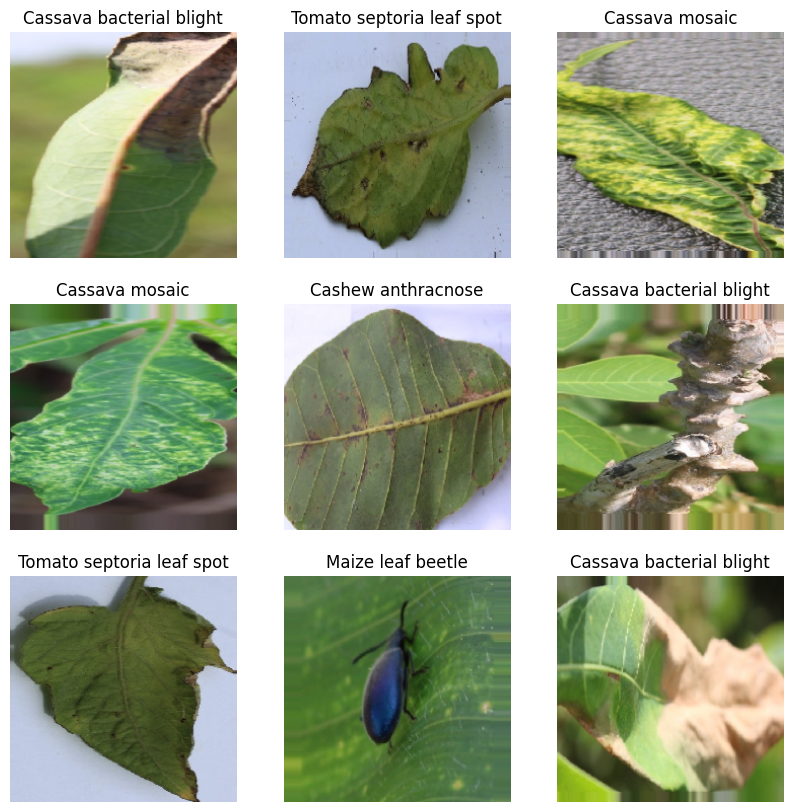

In [10]:
import matplotlib.pyplot as plt

# Get a batch of images
images, labels = next(train_generator)

# Get the class names from the generator
class_names = list(train_generator.class_indices.keys())

# Display the images along with their labels
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])  # Display the class name for each image
    plt.axis('off')
plt.show()



In [11]:
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
ConvNextBase_base = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

350926856/350926856 [==============================] - 2s 0us/step


350926856/350926856 [==============================] - 8s 0us/step


In [12]:
def build_model(base_model):
    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(22, activation='softmax')  # Number of classes
    ])
    return model

In [13]:
# Build models
vgg19_model = build_model(vgg19_base)
resnet_model = build_model(resnet_base)
ConvNextBase_model = build_model(ConvNextBase_base)

In [14]:
vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ConvNextBase_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
vgg19_history = vgg19_model.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
629/629 [==============================] - 464s 694ms/step - loss: 3.2063 - accuracy: 0.1023 - val_loss: 2.9381 - val_accuracy: 0.1093
Epoch 2/5
629/629 [==============================] - 423s 672ms/step - loss: 2.9463 - accuracy: 0.1073 - val_loss: 2.9365 - val_accuracy: 0.1041
Epoch 3/5
629/629 [==============================] - 423s 672ms/step - loss: 2.9432 - accuracy: 0.1060 - val_loss: 2.9365 - val_accuracy: 0.1093
Epoch 4/5
629/629 [==============================] - 424s 674ms/step - loss: 2.9407 - accuracy: 0.1098 - val_loss: 2.9363 - val_accuracy: 0.1093
Epoch 5/5
629/629 [==============================] - 420s 667ms/step - loss: 2.9396 - accuracy: 0.1068 - val_loss: 2.9359 - val_accuracy: 0.1093


In [16]:
# Define the path where you want to save the trained model
model_save_path = '/content/vgg19_trained_model.h5'  # Replace with your desired path and filename

# Save the trained model
vgg19_model.save(model_save_path)

print("VGG19 model saved at:", model_save_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


VGG19 model saved at: /content/vgg19_trained_model.h5


In [17]:
from google.colab import files

# Define the path to the saved model file
model_save_path = '/content/vgg19_trained_model.h5'  # Replace with the path where you saved the model

# Download the model file
files.download(model_save_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
resnet_model_history = resnet_model.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
629/629 [==============================] - 460s 666ms/step - loss: 2.2903 - accuracy: 0.3270 - val_loss: 3.8696 - val_accuracy: 0.0532
Epoch 2/5
629/629 [==============================] - 398s 632ms/step - loss: 1.7545 - accuracy: 0.4469 - val_loss: 3.0758 - val_accuracy: 0.1707
Epoch 3/5
629/629 [==============================] - 397s 631ms/step - loss: 1.4249 - accuracy: 0.5485 - val_loss: 1.9214 - val_accuracy: 0.3943
Epoch 4/5
629/629 [==============================] - 394s 627ms/step - loss: 1.2942 - accuracy: 0.5841 - val_loss: 3.4668 - val_accuracy: 0.2552
Epoch 5/5
629/629 [==============================] - 393s 625ms/step - loss: 1.2906 - accuracy: 0.5887 - val_loss: 6.6345 - val_accuracy: 0.1404


In [19]:
ConvNextBase_model_history = ConvNextBase_model.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5


ResourceExhaustedError: Graph execution error:

Detected at node gradient_tape/sequential_2/convnext_base/convnext_base_stage_2_block_23_gelu/Gelu/mul_1/Mul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-19-2b302adb0633>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 543, in minimize

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients

failed to allocate memory
	 [[{{node gradient_tape/sequential_2/convnext_base/convnext_base_stage_2_block_23_gelu/Gelu/mul_1/Mul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_118346]